# Plots for the Presentation


## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

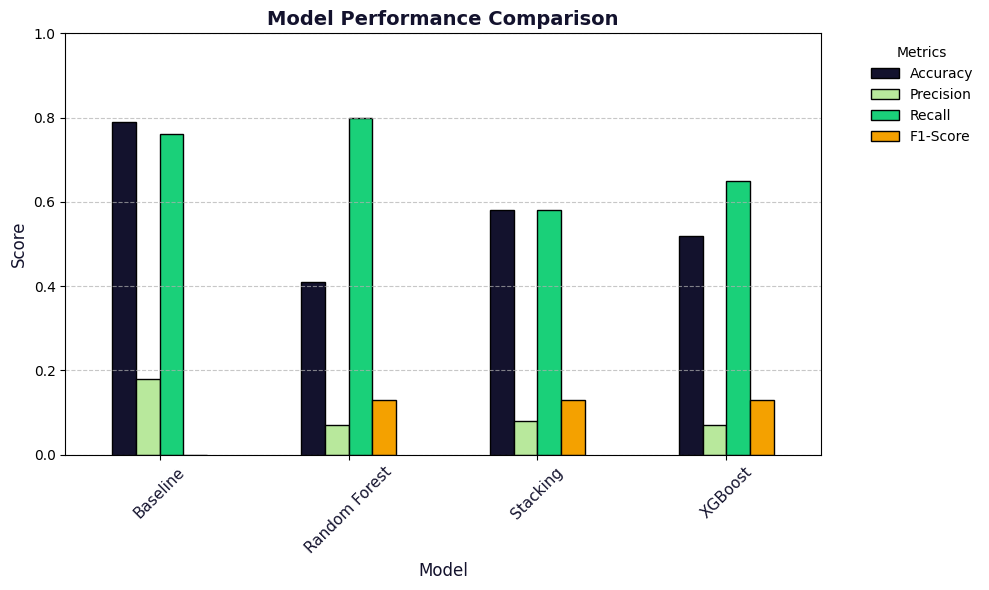

In [ ]:
# Define model performance metrics
models = ['Baseline', 'Random Forest', 'Stacking', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Scores
scores = np.array([
    [0.79, 0.18, 0.76, 0],  # Baseline --> F1 fehlt
    [0.41, 0.07, 0.80 , 0.13],  # Random Forest --> updated
    [0.58, 0.08, 0.58, 0.13],  # Stacking --> updated
    [0.52, 0.07, 0.65, 0.13]   # XGBoost --> updated
])

# Convert to DataFrame for easier plotting
df = pd.DataFrame(scores, columns=metrics, index=models)

# Custom color palette
custom_colors = ['#13122d', '#b8e89c', '#1ad079', '#f4a100', '#13122d']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', ax=ax, color=custom_colors, edgecolor='black')

# Styling
ax.set_title("Model Performance Comparison", fontsize=14, fontweight='bold', color='#13122d')
ax.set_xlabel("Model", fontsize=12, color='#13122d')
ax.set_ylabel("Score", fontsize=12, color='#13122d')
ax.set_xticklabels(models, rotation=45, fontsize=11, color='#13122d')
ax.set_ylim(0, 1)  # Scores range from 0 to 1
ax.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Grid styling
ax.grid(axis='y', linestyle='--', alpha=0.7, color='#b0b0b0')

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

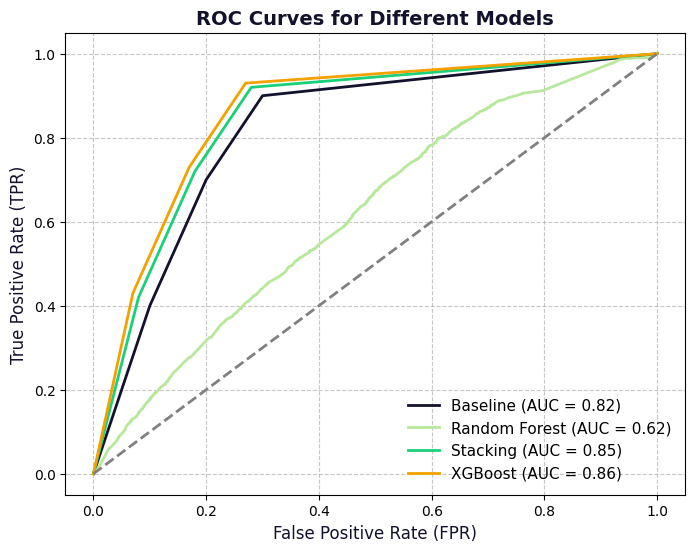

In [ ]:
# Loading the model outputs for FPR and TPR:
fpr_values_dt = np.load("fpr_values_dt.npy")
tpr_values_dt = np.load("tpr_values_dt.npy")
fpr_values_rf = np.load("fpr_values_rf.npy")
tpr_values_rf = np.load("tpr_values_rf.npy")
fpr_values_st = np.load("fpr_values_st.npy")
tpr_values_st = np.load("tpr_values_st.npy")
fpr_values_xg = np.load("fpr_values_xg.npy")
tpr_values_xg = np.load("tpr_values_xg.npy")

# Define model names
models = ['Baseline', 'Random Forest', 'Stacking', 'XGBoost']

# Provide FPR and TPR values:
fpr_values = [
    fpr_values_dt,  # Baseline
    fpr_values_rf,  # Random Forest
    fpr_values_st,  # Stacking
    fpr_values_xg   # XGBoost
]

tpr_values = [
    tpr_values_dt,  # Baseline
    tpr_values_rf,  # Random Forest
    tpr_values_st,  # Stacking
    tpr_values_xg   # XGBoost
]

# Compute AUC scores manually
roc_auc = [auc(fpr_values[i], tpr_values[i]) for i in range(len(models))]

# Define color scheme
colors = ['#13122d', '#b8e89c', '#1ad079', '#f4a100', '#13122d']

# Initialize figure
plt.figure(figsize=(8, 6))

# Plot ROC curves
for i, model in enumerate(models):
    plt.plot(fpr_values[i], tpr_values[i], color=colors[i], lw=2, 
             label=f'{model} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Set title and axis labels
plt.title('ROC Curves for Different Models', fontsize=14, fontweight='bold', color='#13122d')
plt.xlabel('False Positive Rate (FPR)', fontsize=12, color='#13122d')
plt.ylabel('True Positive Rate (TPR)', fontsize=12, color='#13122d')
plt.legend(loc='lower right', fontsize=11, frameon=False)

# Apply grid and styling
plt.grid(True, which='both', linestyle='--', color='#b0b0b0', alpha=0.7)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()